
# MAE 598 Homework 3 <br/>
---



### 1)<br/>

(1) Formulation of the least square problem,

We have the equilibrium relation formula,<br/>
$$pf=x_1exp(A_{12}\frac{A_{21}x_2}{A_{12}x_1+A_{21}x_2})^2 p_1^{sat}+x_2exp(A_{21}\frac{A_{12}x_1}{A_{12}x_1+A_{21}x_2})^2 p_2^{sat}$$<br/>
where $p_1^{sat}=p_{water}^{sat},p_2^{sat}=p_{1,4 dioxane}^{sat}$<br/>
since we know the actual $p$ values,the least square problem can be given by,<br/>
   $$\underset{A12, A21}{min} \sum_{i=1}^{11}(pf(i) - p(i))^2 $$
   

solving using the gradient descent,

estimated A12 and A21 is  tensor([1.9418, 1.7030], requires_grad=True)
loss is  0.6950508


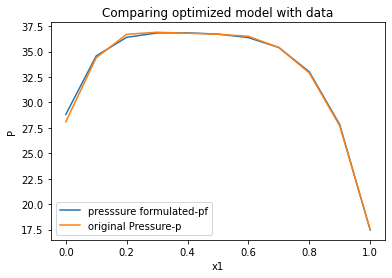

In [21]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable
import matplotlib.pyplot as plt
from IPython import display
x_1=np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
x_2=np.array([1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0])
aw=np.array([8.07131, 1730.63, 233.426])
ad=np.array([7.43155, 1554.679, 240.337])
t=20
pw=10**(aw[0]-aw[1]/(t+aw[2]))
pd=10**(ad[0]-ad[1]/(t+ad[2]))
p=np.array([28.1, 34.4, 36.7, 36.9, 36.8, 36.7, 36.5, 35.4, 32.9, 27.7, 17.5])
p=torch.tensor(p,requires_grad=False,dtype=torch.float32)
A=Variable(torch.tensor([1.0, 1.0]),requires_grad=True)
x1=torch.tensor(x_1,requires_grad=False,dtype=torch.float32)
x2=torch.tensor(x_2,requires_grad=False,dtype=torch.float32)
a=.0001
for i in range(200):
    pf=x1*torch.exp(A[0]*(A[1]*x2/(A[0]*x1+A[1]*x2))**2)*pw + x2*torch.exp(A[1]*(A[0]*x1/(A[0]*x1+A[1]*x2))**2)*pd
    loss=(pf-p)**2
    loss=loss.sum()
    loss.backward()
    with torch.no_grad():
            A-=a*A.grad
            A.grad.zero_()
print('estimated A12 and A21 is ',A)
print('loss is ',loss.data.numpy())
pf=pf.detach().numpy()
p=p.detach().numpy()
x1= x1.detach().numpy()
plt.plot(x1,pf,label='presssure formulated-pf')
plt.plot(x1,p,label='original Pressure-p')
plt.xlabel('x1')
plt.ylabel('P')
plt.legend()
plt.title('Comparing optimized model with data')
plt.show()

From the graph we can see that our optimized model fits well with the data.<br/>
